In [50]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from math import sqrt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

/Users/akinfemi/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
len(df) #Over 1million rows of data

1017209

#### >1million rows for 1115 stores. we will limit the analysis to just one store

In [6]:
df['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

#### Using store 1

In [16]:
data = df[df['Store'] == 1]
data = data[data.Sales != 0]

In [17]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,781.0,781.000000,781.000000,781.000000,781.0,781.000000,781.000000
mean,1.0,3.504481,4759.096031,564.049936,1.0,0.448143,0.204866
std,0.0,1.714656,1012.106393,93.707476,0.0,0.497622,0.403862
min,1.0,1.000000,2362.000000,298.000000,1.0,0.000000,0.000000
25%,1.0,2.000000,4000.000000,500.000000,1.0,0.000000,0.000000
50%,1.0,3.000000,4647.000000,550.000000,1.0,0.000000,0.000000
75%,1.0,5.000000,5348.000000,612.000000,1.0,1.000000,0.000000
max,1.0,6.000000,9528.000000,1130.000000,1.0,1.000000,1.000000


In [18]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1


In [19]:
data['Date'] =pd.to_datetime(data.Date)

In [20]:
data = data.sort_values(by='Date')

In [21]:
df['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

#### Converting the Categorical Data of Day of Week to One Hot Encoded matrix

In [22]:
encoded = to_categorical(data['DayOfWeek'])
f = pd.DataFrame(encoded, columns=['S','M','T','W','Th','F','St'], index=data.index)

In [23]:
c_list = list(f.columns)
for day in c_list:
    data[day] = f[day]

In [24]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,S,M,T,W,Th,F,St
1014980,1,3,2013-01-02,5530,668,1,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1013865,1,4,2013-01-03,4327,578,1,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1012750,1,5,2013-01-04,4486,619,1,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1011635,1,6,2013-01-05,4997,635,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1009405,1,1,2013-01-07,7176,785,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Notes:
* Drop DayOfWeek since it has been replaced with the encoding.
* Drop Date beacause any effect of the date would be reflected in the StateHoliday and School Holiday columns
* Drop Store and Customers because I don't think they have any effect on the analysis

In [25]:
data = data.drop(['DayOfWeek', 'Store', 'Customers'], axis=1)

In [26]:
train = data[data.Date < '2015-01-01']
test = data[data.Date > '2014-12-31']

In [27]:
######
train = train.set_index('Date')

In [28]:
test = test.set_index('Date')

In [30]:
test.describe()

,Sales,Open,Promo,SchoolHoliday,S,M,T,W,Th,F,St
count,175.000000,175.0,175.000000,175.000000,175.0,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,4527.462857,1.0,0.468571,0.120000,0.0,0.160000,0.171429,0.171429,0.160000,0.165714,0.171429
std,817.102364,0.0,0.500443,0.325894,0.0,0.367658,0.377964,0.377964,0.367658,0.372891,0.377964
min,3037.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3886.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4431.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5032.500000,1.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6816.000000,1.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
list(train.columns)

['Sales',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'S',
 'M',
 'T',
 'W',
 'Th',
 'F',
 'St']

In [32]:
train.head()

,Sales,Open,Promo,StateHoliday,SchoolHoliday,S,M,T,W,Th,F,St
Date,,,,,,,,,,,,
2013-01-02,5530,1,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2013-01-03,4327,1,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-04,4486,1,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-05,4997,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-01-07,7176,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Notes:
* Seems like there are about 273 unique customers, since we are predicting sales, that shouldn't matter.
* Rows with 0 sales were be dropped.
* Assumption: The effect of the date would be reflected in the colums "StateHoliday" and "SchoolHoliday"
* Since "DayOfWeek" is categorical, it would be transformed to a one-hot encoded entry, taking 0 as Sunday
* "Store" Column will be dropped and "Date column for this analysis

In [33]:
train_Y = pd.DataFrame(train['Sales']).values

In [34]:
test_Y = pd.DataFrame(test['Sales']).values

In [35]:
test_X = test.drop(['Sales'],axis=1).values

In [36]:
x = train.drop(['Sales'],axis=1).values

In [37]:
train_X = x

In [39]:
lin_reg = linear_model.LinearRegression()

In [40]:
lin_reg.fit(train_X, train_Y)

/Users/akinfemi/miniconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
y_predictions = lin_reg.predict(test_X)

In [42]:
print("RMSE: %.2f"
      % sqrt(mean_squared_error(test_Y, y_predictions)))

RMSE: 674.51


In [43]:
print('R2 score: %.2f' % r2_score(test_Y, y_predictions))

R2 score: 0.31


In [44]:
mean_absolute_error(test_Y, y_predictions)

553.9314285714286

#### Ridge + Cross Validation

In [45]:
reg = linear_model.RidgeCV(alphas=[0.1,1.0,10.0], cv=3)

In [46]:
reg.fit(train_X, train_Y)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=3, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [47]:
y_pred = reg.predict(test_X)
print("RMSE: %.2f"
      % sqrt(mean_squared_error(test_Y, y_pred)))
print('R2 score: %.2f' % r2_score(test_Y, y_pred))
print('R2 score: %.2f' % mean_absolute_error(test_Y, y_pred))

RMSE: 674.81
R2 score: 0.31
R2 score: 553.91


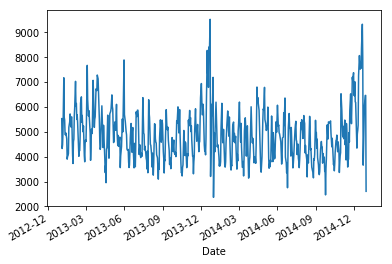

In [51]:
train.Sales.plot()

# KNN

In [52]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

In [53]:
knn = neighbors.KNeighborsRegressor()
params = {'n_neighbors':[x for x in range(1,51)]}
model = GridSearchCV(knn, params, cv=5)
model.fit(train_X,train_Y)
K=model.best_params_['n_neighbors']
print(K)

28


In [54]:
model = neighbors.KNeighborsRegressor(n_neighbors = K, algorithm='auto')

model.fit(train_X, train_Y)  #fit the model
pred=model.predict(test_X) #make prediction on test set
error = sqrt(mean_squared_error(test_Y,pred)) #calculate rmse
r2 = r2_score(test_Y,pred)
mae = mean_absolute_error(test_Y,pred)
print('RMSE: %.2f, R2: %.2f, MAE: %.2f' % (error, r2, mae))

RMSE: 655.33, R2: 0.35, MAE: 524.06


#### Notes
* The KNN Algorithm also has a low R2 score

# Neural Networks

In [55]:
from sklearn.neural_network import MLPRegressor

In [56]:
nn_reg = MLPRegressor()

#### Feature Scaling is not necessary since all the training data are 1s and 0s (One Hot encoded)

#### Hyperparameter Tuning

In [57]:
learning_rate_init = 0.01
batch_size = 100
max_iter = 5000

In [58]:
nn_reg = MLPRegressor(learning_rate_init=learning_rate_init, batch_size=batch_size, max_iter=max_iter)

In [59]:
nn_reg.fit(train_X, train_Y.ravel())

MLPRegressor(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [60]:
nn_predictions = nn_reg.predict(test_X)
sqrt(mean_squared_error(nn_predictions, test_Y))

654.5583669339746

In [61]:
r2_score(nn_predictions, test_Y)

-0.12617857721283876

In [62]:
mean_absolute_error(nn_predictions, test_Y)

535.6791005761246

#### Quasi-Newton Method Optimizer

In [63]:
nn_reg = MLPRegressor(learning_rate_init=0.01, batch_size=100, max_iter=max_iter, solver='lbfgs')

In [64]:
nn_reg.fit(train_X, train_Y.ravel())

MLPRegressor(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [65]:
nn_predictions = nn_reg.predict(test_X)
sqrt(mean_squared_error(nn_predictions, test_Y))
# r2_score(nn_predictions, test_Y)

677.7617987441145

In [66]:
r2_score(nn_predictions, test_Y)

0.01435992234062089

In [67]:
mean_absolute_error(nn_predictions, test_Y)

551.199393424974

#### Stochastic Gradient Descent

In [68]:
nn_reg = MLPRegressor(learning_rate_init=0.01, batch_size=batch_size, max_iter=max_iter, solver='sgd')

In [69]:
nn_reg.fit(train_X, train_Y.ravel())

MLPRegressor(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [70]:
nn_predictions = nn_reg.predict(test_X)
sqrt(mean_squared_error(nn_predictions, test_Y))

855.5468438141195

In [71]:
r2_score(nn_predictions, test_Y)

-8.848858288653108e+29

In [72]:
mean_absolute_error(nn_predictions, test_Y)

711.3963405507869

### Summary
* Using Linear Regression, KNN and Neural Networks (with no activation layer at the output) the RMSE is within the same range
* For the Neural Networks Adam Optimizer has the least RMSE

## TRADITIONAL FORECASTING METHODOLOGIES

In [73]:
excel_data = data[['Date','Sales']]

In [74]:
excel_data.head()

,Date,Sales
1014980,2013-01-02,5530
1013865,2013-01-03,4327
1012750,2013-01-04,4486
1011635,2013-01-05,4997
1009405,2013-01-07,7176


#### 2013 Data

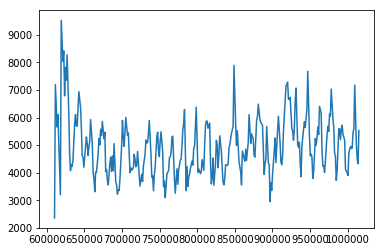

In [98]:
excel_data[excel_data.Date < '2014-01-01']['Sales'].plot()

#### 2014 Data

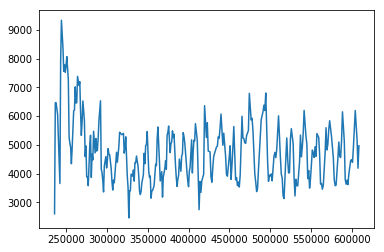

In [103]:
excel_data[(excel_data.Date > '2013-12-31') & (excel_data.Date < '2015-01-01')]['Sales'].plot()

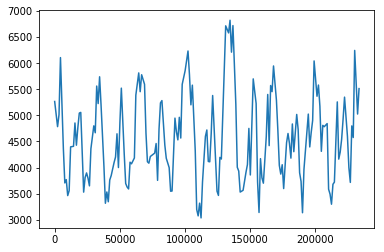

In [105]:
excel_data[excel_data.Date > '2014-12-31']['Sales'].plot()

#### Notes:
* There seems to be some seasonality around the begining of the years

In [158]:
from statsmodels.tsa.seasonal import seasonal_decompose
from plotly.plotly import plot_mpl

In [161]:
import plotly

In [162]:
plotly.tools.set_credentials_file(username='akinfemi', api_key='O5eaHG6smWVkxmUjDQvS')

In [163]:
tx = train_X.astype(int)
result = seasonal_decompose(tx, freq=2)
fig = result.plot()
plot_mpl(fig)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~akinfemi/0 or inside your plot.ly account where it is named 'plot from API'


'https://plot.ly/~akinfemi/0'

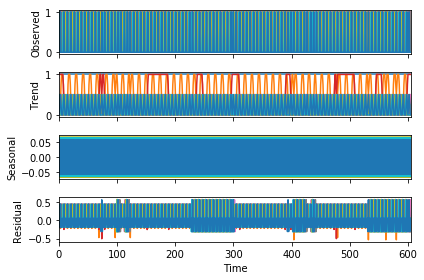

<Figure size 1440x720 with 0 Axes>

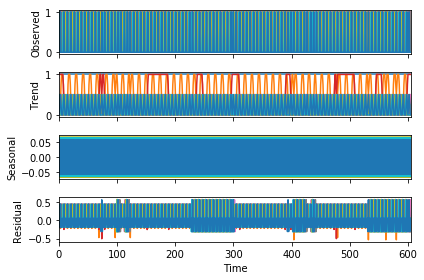

In [153]:
result.plot()

In [170]:
from pyramid.arima import auto_arima

In [183]:
stepwise_model = auto_arima(train['Sales'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

In [75]:
t_test = test
t_train = train

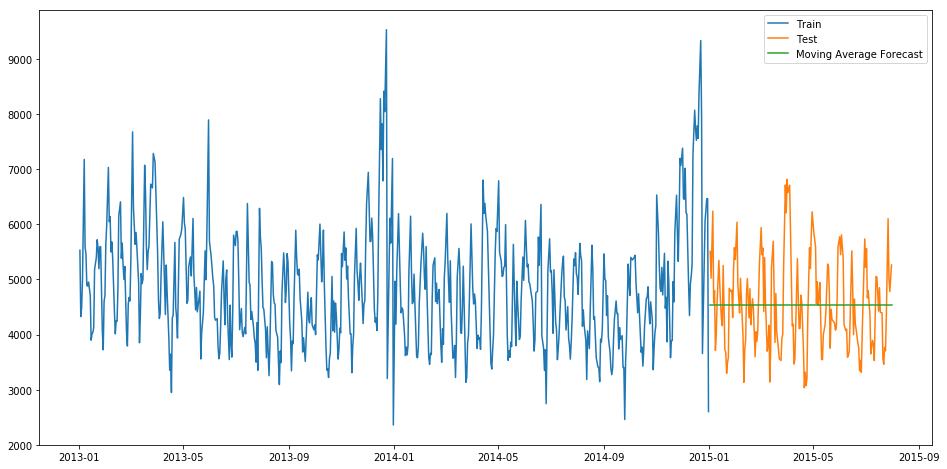

In [76]:
y_hat_avg = t_test.copy()
y_hat_avg['moving_avg_forecast'] = t_train['Sales'].rolling(2).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(t_train['Sales'], label='Train')
plt.plot(t_test['Sales'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [77]:
sqrt(mean_squared_error(y_hat_avg['Sales'],y_hat_avg['moving_avg_forecast']))

814.804080745795

### Simple Exponential Smoothing

In [78]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

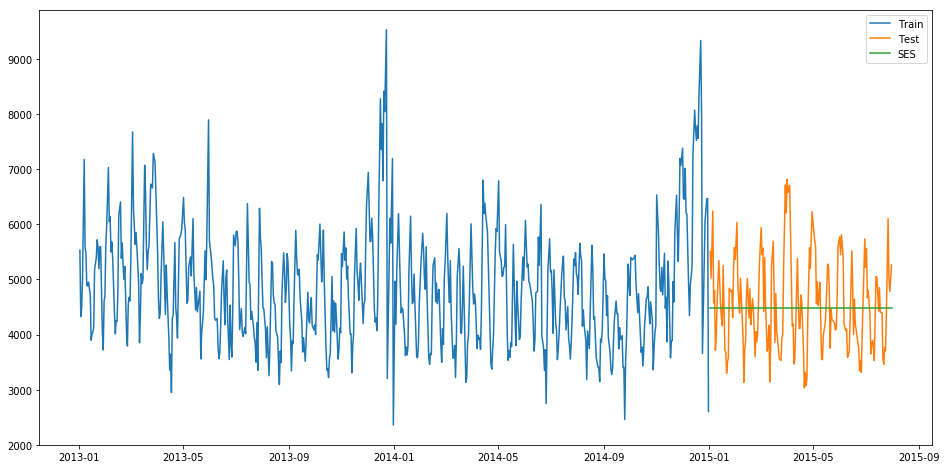

In [79]:
y_hat_avg = t_test.copy()
fit2 = SimpleExpSmoothing(np.asarray(t_train['Sales'])).fit(smoothing_level=0.5)
y_hat_avg['SES'] = fit2.forecast(len(t_test))
plt.figure(figsize=(16,8))
plt.plot(t_train['Sales'], label='Train')
plt.plot(t_test['Sales'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [80]:
sqrt(mean_squared_error(y_hat_avg['Sales'],y_hat_avg['SES']))

816.1813247925656

In [81]:
mean_absolute_error(y_hat_avg['Sales'],y_hat_avg['SES'])

665.9642292535156

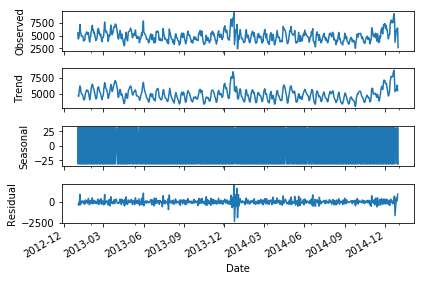

In [82]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(t_train.Sales, freq=2).plot()
result = sm.tsa.stattools.adfuller(t_train.Sales)
plt.show()

### HW

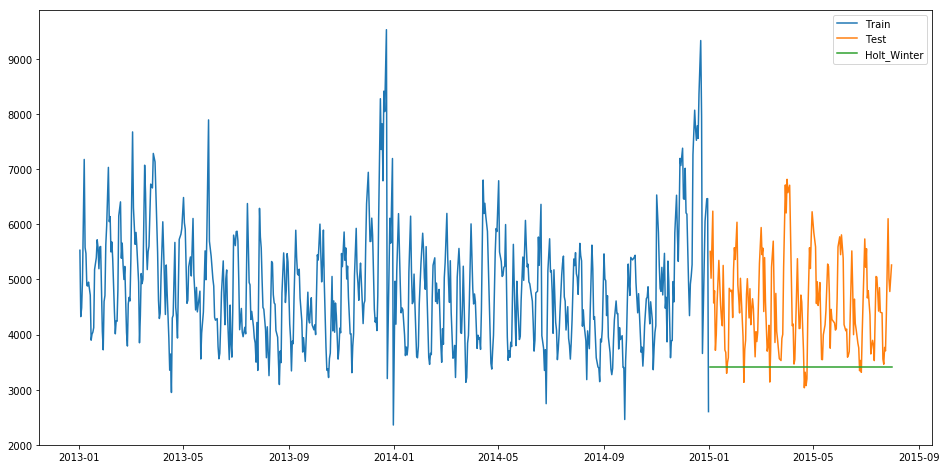

In [83]:
y_hat_avg = t_test.copy()
fit1 = ExponentialSmoothing(np.asarray(t_train['Sales']), seasonal_periods=12 ).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(t_test))
y_hat_avg['Holt_Winter'] = y_hat_avg['Holt_Winter']
plt.figure(figsize=(16,8))
plt.plot(t_train['Sales'], label='Train')
plt.plot(t_test['Sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [84]:
sqrt(mean_squared_error(y_hat_avg['Sales'],y_hat_avg['Holt_Winter']))

1383.820697523834

/Users/akinfemi/miniconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



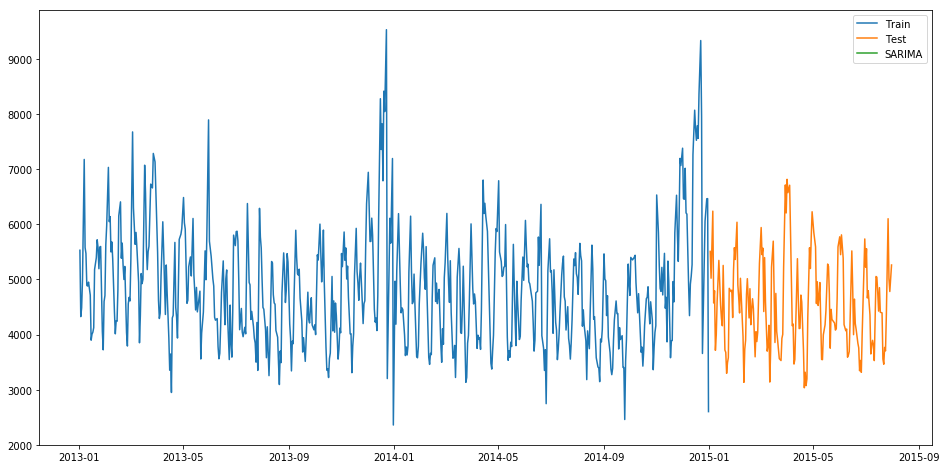

In [262]:
y_hat_avg = t_test.copy()
fit1 = sm.tsa.statespace.SARIMAX(t_train.Sales, order=(1, 1, 1),seasonal_order=(0,1,1,12)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start=1, end=175, dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(t_train['Sales'], label='Train')
plt.plot(t_test['Sales'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [270]:
t_train.loc['2013-01-02'].Sales

5530

### Holt Linear

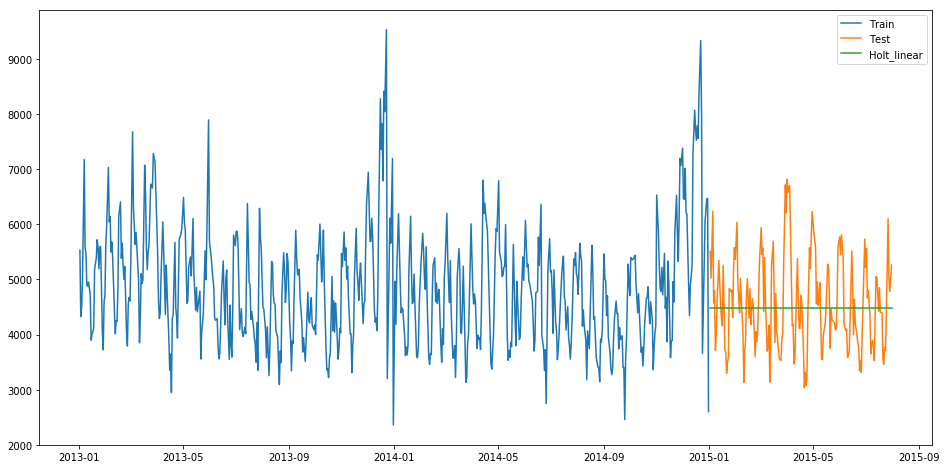

In [86]:
y_hat_avg = t_test.copy()

fit1 = Holt(np.asarray(t_train['Sales'])).fit(smoothing_level = 0.5)
y_hat_avg['Holt_linear'] = fit1.forecast(len(t_test))

plt.figure(figsize=(16,8))
plt.plot(t_train['Sales'], label='Train')
plt.plot(t_test['Sales'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [87]:
rms = sqrt(mean_squared_error(t_test.Sales, y_hat_avg.Holt_linear))
print(rms)

816.1813247925656


/Users/akinfemi/miniconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



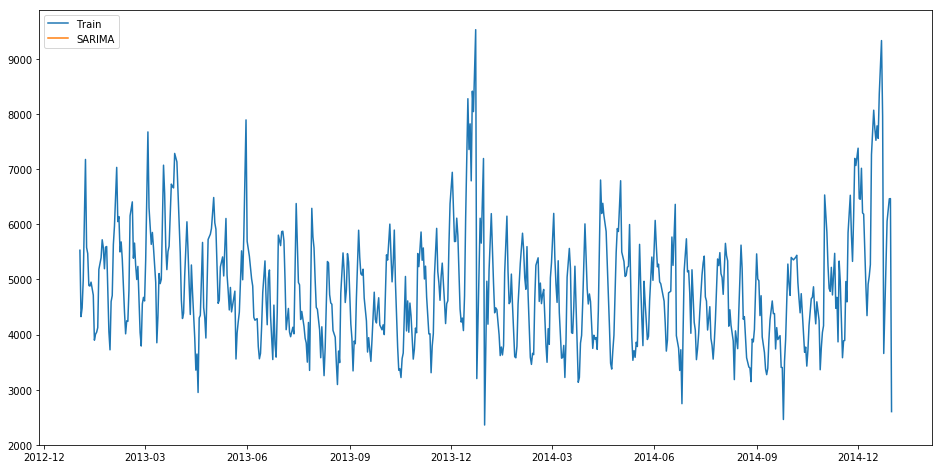

In [310]:
y_hat_avg = t_test.copy()
fit1 = sm.tsa.statespace.SARIMAX(t_train.Sales).fit()
y_hat_avg['SARIMA'] = fit1.predict()
plt.figure(figsize=(16,8))
plt.plot(t_train['Sales'], label='Train')
# plt.plot(t_test['Sales'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [312]:
fit1.predict()

Date
2013-01-02       0.000000
2013-01-03    5449.791440
2013-01-04    4264.240065
2013-01-05    4420.933888
2013-01-07    4924.522211
2013-01-08    7071.917428
2013-01-09    5499.066227
2013-01-10    5391.647192
2013-01-11    4821.045158
2013-01-12    4810.204705
2013-01-14    4880.174903
2013-01-15    4648.583404
2013-01-16    3843.433385
2013-01-17    3949.866924
2013-01-18    3985.344771
2013-01-19    4067.140917
2013-01-21    5106.838923
2013-01-22    5315.764020
2013-01-23    5637.035631
2013-01-24    5497.095236
2013-01-25    5119.650367
2013-01-26    5504.979202
2013-01-28    5516.805150
2013-01-29    3996.185224
2013-01-30    3670.971630
2013-01-31    4534.265898
2013-02-01    4640.699438
2013-02-02    5551.297501
2013-02-04    5883.409566
2013-02-05    6930.006041
                 ...     
2014-11-25    6432.330693
2014-11-26    5730.657726
2014-11-27    5250.721301
2014-11-28    6054.885824
2014-11-29    7090.641847
2014-12-01    6963.512896
2014-12-02    7272.958559
2014-12

In [298]:
model = sm.tsa.statespace.SARIMAX(t_train.Sales)

/Users/akinfemi/miniconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [301]:
prd = model.fit()

In [302]:
prd.predict()

Date
2013-01-02       0.000000
2013-01-03    5449.791440
2013-01-04    4264.240065
2013-01-05    4420.933888
2013-01-07    4924.522211
2013-01-08    7071.917428
2013-01-09    5499.066227
2013-01-10    5391.647192
2013-01-11    4821.045158
2013-01-12    4810.204705
2013-01-14    4880.174903
2013-01-15    4648.583404
2013-01-16    3843.433385
2013-01-17    3949.866924
2013-01-18    3985.344771
2013-01-19    4067.140917
2013-01-21    5106.838923
2013-01-22    5315.764020
2013-01-23    5637.035631
2013-01-24    5497.095236
2013-01-25    5119.650367
2013-01-26    5504.979202
2013-01-28    5516.805150
2013-01-29    3996.185224
2013-01-30    3670.971630
2013-01-31    4534.265898
2013-02-01    4640.699438
2013-02-02    5551.297501
2013-02-04    5883.409566
2013-02-05    6930.006041
                 ...     
2014-11-25    6432.330693
2014-11-26    5730.657726
2014-11-27    5250.721301
2014-11-28    6054.885824
2014-11-29    7090.641847
2014-12-01    6963.512896
2014-12-02    7272.958559
2014-12